In [1]:
from google.colab import drive
import os

# 드라이브 마운트 (인증 필요)
drive.mount('/content/drive')

print("✅ Google Drive가 성공적으로 마운트되었습니다!")

Mounted at /content/drive
✅ Google Drive가 성공적으로 마운트되었습니다!


In [1]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,845 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126371 files and dire

In [2]:
!sudo fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [3]:
!rm ~/.cache/matplotlib -rf

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [3]:
# 기본 라이브러리 임포트
import os
import shutil
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from PIL import Image

print("✅ 라이브러리 설치 및 임포트 완료!")

✅ 라이브러리 설치 및 임포트 완료!


In [4]:
PROJECT_NAME = "BugClassification"
PROJECT_PATH = f'/content/drive/MyDrive/{PROJECT_NAME}'
BUG_DATA_PATH = '/content/drive/MyDrive/Bug'  # bug 폴더 경로
IMAGES_PATH = os.path.join(BUG_DATA_PATH, 'images')
LABELS_PATH = os.path.join(BUG_DATA_PATH, 'labels')

In [5]:
BUG_CLASSES = ['나방', '노린재', '담배가루이', '무당벌레']

print("🐛 벌레 분류 프로젝트 시작!")
print(f"데이터 경로: {BUG_DATA_PATH}")
print(f"분류할 벌레 종류: {BUG_CLASSES}")

🐛 벌레 분류 프로젝트 시작!
데이터 경로: /content/drive/MyDrive/Bug
분류할 벌레 종류: ['나방', '노린재', '담배가루이', '무당벌레']


In [6]:
# 경로 변수들 정의
PROCESSED_DATA_PATH = os.path.join(PROJECT_PATH, 'processed_dataset')
MODELS_PATH = os.path.join(PROJECT_PATH, 'models')
RESULTS_PATH = os.path.join(PROJECT_PATH, 'results')
IMAGES_PATH = os.path.join(BUG_DATA_PATH, 'images')
LABELS_PATH = os.path.join(BUG_DATA_PATH, 'labels')

In [7]:
def check_bug_dataset(base_path):
    """벌레 데이터셋 구조와 이미지 수 확인"""
    print(f"\n📊 데이터셋 구조 확인:")

    images_path = os.path.join(base_path, 'images')
    labels_path = os.path.join(base_path, 'labels')

    if not os.path.exists(images_path):
        print(f"❌ images 폴더를 찾을 수 없습니다: {images_path}")
        return False

    if not os.path.exists(labels_path):
        print(f"❌ labels 폴더를 찾을 수 없습니다: {labels_path}")
        return False

    print(f"✅ Images 폴더: {images_path}")
    print(f"✅ Labels 폴더: {labels_path}")

    total_images = 0
    for bug_class in BUG_CLASSES:
        class_path = os.path.join(images_path, bug_class)
        if os.path.exists(class_path):
            image_files = [f for f in os.listdir(class_path)
                          if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            num_images = len(image_files)
            total_images += num_images
            print(f"  🐛 {bug_class}: {num_images}장")
        else:
            print(f"  ❌ {bug_class} 폴더 없음")

    print(f"📈 총 이미지 수: {total_images}장")
    return True

In [8]:
if check_bug_dataset(BUG_DATA_PATH):
    print("✅ 데이터셋 구조 확인 완료!")
else:
    print("❌ 데이터셋 구조를 확인해주세요.")


📊 데이터셋 구조 확인:
✅ Images 폴더: /content/drive/MyDrive/Bug/images
✅ Labels 폴더: /content/drive/MyDrive/Bug/labels
  🐛 나방: 100장
  🐛 노린재: 100장
  🐛 담배가루이: 100장
  🐛 무당벌레: 100장
📈 총 이미지 수: 400장
✅ 데이터셋 구조 확인 완료!


In [9]:
def create_train_val_test_split(source_path, target_path, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1):
    """이미지를 훈련/검증/테스트로 분할"""

    # 타겟 폴더 생성
    splits = ['train', 'validation', 'test']
    for split in splits:
        for bug_class in BUG_CLASSES:
            split_class_path = os.path.join(target_path, split, bug_class)
            os.makedirs(split_class_path, exist_ok=True)

    print(f"\n📂 데이터 분할 시작...")

    for bug_class in BUG_CLASSES:
        class_source = os.path.join(source_path, 'images', bug_class)

        if not os.path.exists(class_source):
            continue

        # 클래스별 이미지 파일 목록
        image_files = [f for f in os.listdir(class_source)
                      if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # 데이터 분할
        train_files, temp_files = train_test_split(image_files, test_size=(val_ratio + test_ratio), random_state=42)
        val_files, test_files = train_test_split(temp_files, test_size=(test_ratio/(val_ratio + test_ratio)), random_state=42)

        # 파일 복사
        file_splits = {
            'train': train_files,
            'validation': val_files,
            'test': test_files
        }

        for split, files in file_splits.items():
            target_class_path = os.path.join(target_path, split, bug_class)
            for file in files:
                source_file = os.path.join(class_source, file)
                target_file = os.path.join(target_class_path, file)
                shutil.copy2(source_file, target_file)

        print(f"  🐛 {bug_class}: 훈련 {len(train_files)}, 검증 {len(val_files)}, 테스트 {len(test_files)}")

In [10]:
PROCESSED_DATA_PATH = os.path.join(PROJECT_PATH, 'processed_dataset')
create_train_val_test_split(BUG_DATA_PATH, PROCESSED_DATA_PATH)


📂 데이터 분할 시작...
  🐛 나방: 훈련 69, 검증 20, 테스트 11
  🐛 노린재: 훈련 69, 검증 20, 테스트 11
  🐛 담배가루이: 훈련 69, 검증 20, 테스트 11
  🐛 무당벌레: 훈련 69, 검증 20, 테스트 11


In [11]:
if not os.path.exists(BUG_DATA_PATH):
    print(f"❌ bug 폴더를 찾을 수 없습니다: {BUG_DATA_PATH}")
    print(f"📝 올바른 경로를 입력하세요:")
    print(f"   예시: BUG_DATA_PATH = '/content/drive/MyDrive/실제폴더명'")
else:
    create_train_val_test_split(BUG_DATA_PATH, PROCESSED_DATA_PATH)
    print("✅ 데이터 분할 완료!")


📂 데이터 분할 시작...
  🐛 나방: 훈련 69, 검증 20, 테스트 11
  🐛 노린재: 훈련 69, 검증 20, 테스트 11
  🐛 담배가루이: 훈련 69, 검증 20, 테스트 11
  🐛 무당벌레: 훈련 69, 검증 20, 테스트 11
✅ 데이터 분할 완료!


In [12]:
def create_data_generators(data_path, img_size=(224, 224), batch_size=32):
    """데이터 제너레이터 생성"""

    # 훈련 데이터 증강
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # 검증/테스트 데이터 (증강 없음)
    val_test_datagen = ImageDataGenerator(rescale=1./255)

    # 데이터 제너레이터 생성
    train_generator = train_datagen.flow_from_directory(
        os.path.join(data_path, 'train'),
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        classes=BUG_CLASSES
    )

    validation_generator = val_test_datagen.flow_from_directory(
        os.path.join(data_path, 'validation'),
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        classes=BUG_CLASSES
    )

    test_generator = val_test_datagen.flow_from_directory(
        os.path.join(data_path, 'test'),
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        classes=BUG_CLASSES,
        shuffle=False
    )

    return train_generator, validation_generator, test_generator

In [13]:
def show_sample_images(data_path, num_samples=4):
    """각 클래스별 샘플 이미지 표시"""
    plt.figure(figsize=(15, 12))

    for i, bug_class in enumerate(BUG_CLASSES):
        class_path = os.path.join(data_path, 'train', bug_class)
        if os.path.exists(class_path):
            image_files = [f for f in os.listdir(class_path)
                          if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

            for j in range(min(num_samples, len(image_files))):
                plt.subplot(len(BUG_CLASSES), num_samples, i * num_samples + j + 1)

                img_path = os.path.join(class_path, image_files[j])
                img = plt.imread(img_path)
                plt.imshow(img)
                plt.title(f'{bug_class}')
                plt.axis('off')

    plt.suptitle('벌레 클래스별 샘플 이미지', fontsize=16)
    plt.tight_layout()
    plt.show()

In [14]:
def create_bug_classification_model(num_classes=4, img_size=(224, 224)):
    """벌레 분류를 위한 CNN 모델 생성"""

    # MobileNetV2 백본 사용 (전이학습)
    base_model = keras.applications.MobileNetV2(
        input_shape=(*img_size, 3),
        include_top=False,
        weights='imagenet'
    )

    # 백본 모델 freeze
    base_model.trainable = False

    # 분류기 추가
    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax', name='predictions')
    ])

    return model

In [15]:
def train_bug_model(model, train_gen, val_gen, epochs=20):
    """모델 훈련"""

    # 모델 컴파일
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # 콜백 함수
    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=5,
            restore_best_weights=True
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=3,
            min_lr=0.0001
        ),
        keras.callbacks.ModelCheckpoint(
            os.path.join(MODELS_PATH, 'best_bug_model.h5'),
            save_best_only=True,
            monitor='val_accuracy'
        )
    ]

    # 모델 훈련
    history = model.fit(
        train_gen,
        epochs=epochs,
        validation_data=val_gen,
        callbacks=callbacks,
        verbose=1
    )

    return history

In [16]:
def plot_training_history(history):
    """훈련 과정 시각화"""
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='훈련 정확도')
    plt.plot(history.history['val_accuracy'], label='검증 정확도')
    plt.title('모델 정확도')
    plt.xlabel('에포크')
    plt.ylabel('정확도')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='훈련 손실')
    plt.plot(history.history['val_loss'], label='검증 손실')
    plt.title('모델 손실')
    plt.xlabel('에포크')
    plt.ylabel('손실')
    plt.legend()

    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_PATH, 'training_history.png'))
    plt.show()

In [17]:
def evaluate_model(model, test_generator):
    """모델 평가 및 혼동 행렬 생성"""

    # 예측
    predictions = model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes

    # 혼동 행렬
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=BUG_CLASSES, yticklabels=BUG_CLASSES)
    plt.title('벌레 분류 혼동 행렬')
    plt.xlabel('예측 라벨')
    plt.ylabel('실제 라벨')
    plt.savefig(os.path.join(RESULTS_PATH, 'confusion_matrix.png'))
    plt.show()

    # 분류 리포트
    print("분류 리포트:")
    print(classification_report(true_classes, predicted_classes,
                              target_names=BUG_CLASSES))

    # 정확도 계산
    accuracy = np.mean(predicted_classes == true_classes)
    print(f"\n테스트 정확도: {accuracy:.4f}")

    return accuracy, cm

🐛 벌레 분류 모델 훈련을 시작합니다!

📸 각 클래스별 샘플 이미지 확인:


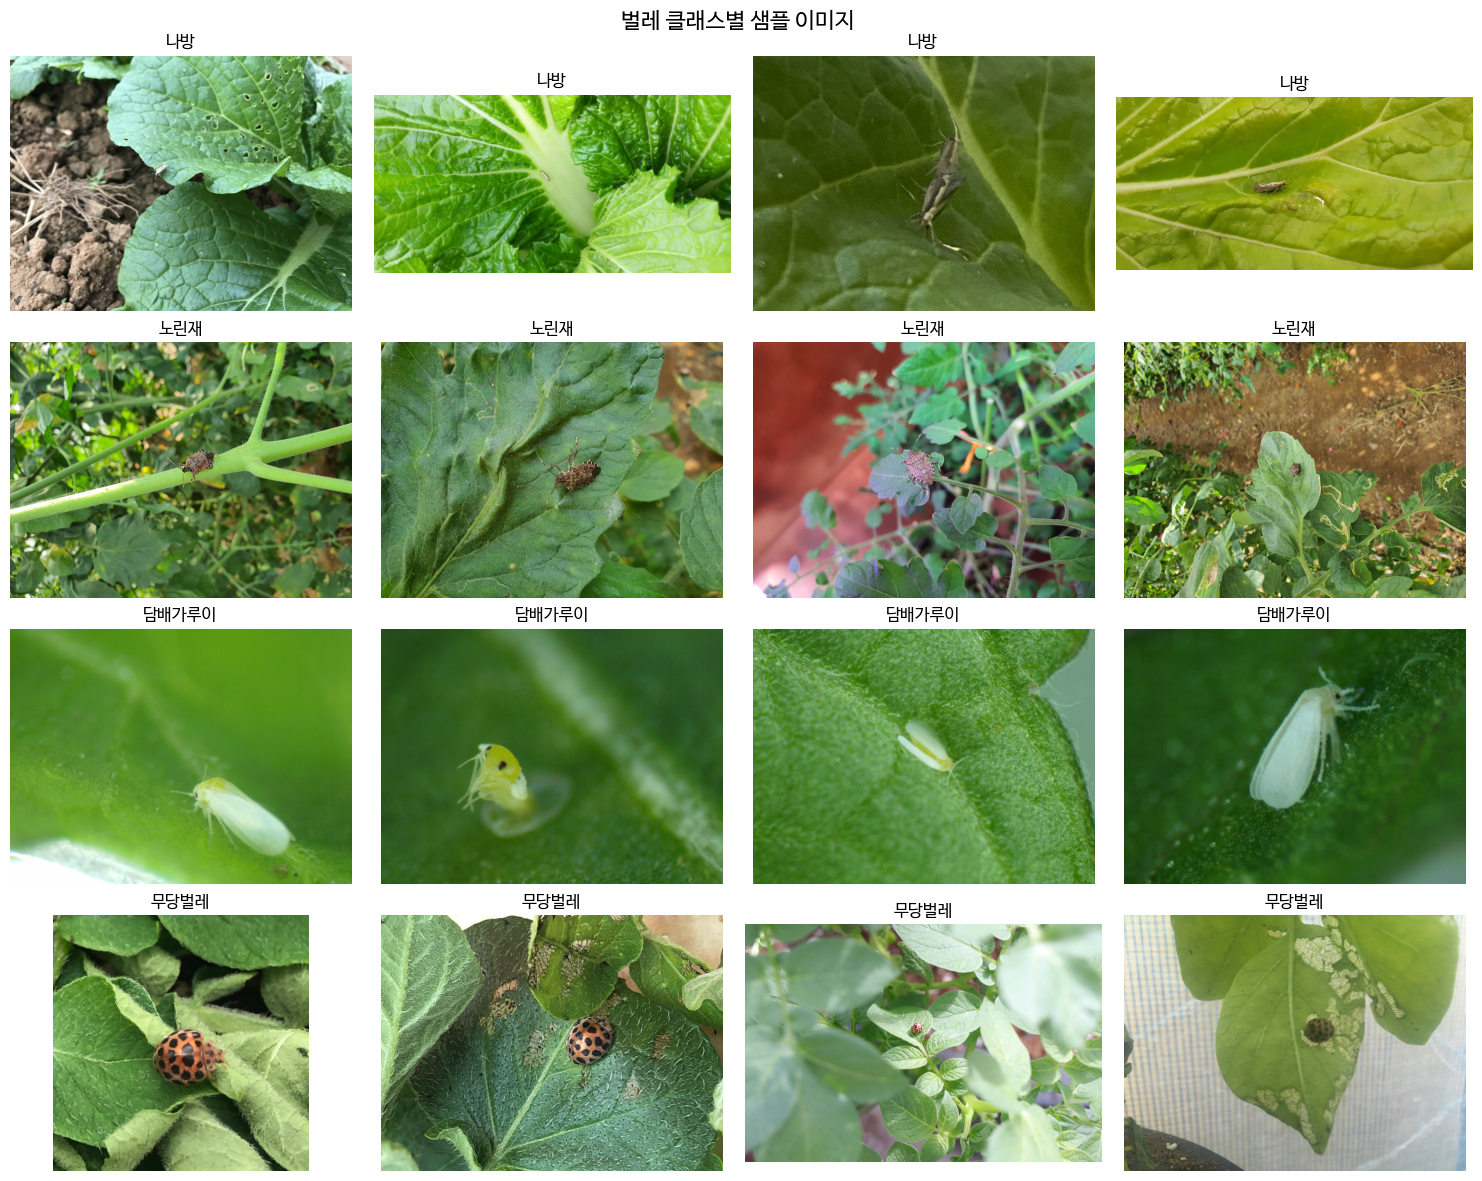

In [18]:
print("🐛 벌레 분류 모델 훈련을 시작합니다!")

# 1. 먼저 샘플 이미지 확인
print("\n📸 각 클래스별 샘플 이미지 확인:")
show_sample_images(PROCESSED_DATA_PATH)

In [19]:
# 2. 데이터 제너레이터 생성
print("\n🔄 데이터 로더 생성 중...")
train_gen, val_gen, test_gen = create_data_generators(PROCESSED_DATA_PATH, batch_size=16)

print(f"✅ 데이터 로더 생성 완료!")
print(f"  훈련 데이터: {train_gen.samples}개")
print(f"  검증 데이터: {val_gen.samples}개")
print(f"  테스트 데이터: {test_gen.samples}개")
print(f"  클래스 수: {train_gen.num_classes}개")
print(f"  클래스 라벨: {list(train_gen.class_indices.keys())}")


🔄 데이터 로더 생성 중...
Found 276 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 44 images belonging to 4 classes.
✅ 데이터 로더 생성 완료!
  훈련 데이터: 276개
  검증 데이터: 80개
  테스트 데이터: 44개
  클래스 수: 4개
  클래스 라벨: ['나방', '노린재', '담배가루이', '무당벌레']


In [20]:
# 3. 모델 생성
print("\n🧠 모델 생성 중...")
model = create_bug_classification_model(num_classes=len(BUG_CLASSES))

# 모델 구조 출력
print("📋 모델 구조:")
model.summary()


🧠 모델 생성 중...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
📋 모델 구조:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,980 (9.24 MB)

 Trainable params: 164,740 (643.52 KB)

 Non-trainable params: 2,258,240 (8.61 MB)

In [21]:
# 4. 시스템 정보 확인
print(f"\n💻 시스템 정보:")
print(f"  TensorFlow 버전: {tf.__version__}")
print(f"  GPU 사용 가능: {len(tf.config.experimental.list_physical_devices('GPU')) > 0}")

# GPU 메모리 최적화
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("✅ GPU 메모리 최적화 설정 완료")
    except RuntimeError as e:
        print(f"GPU 설정 오류: {e}")


💻 시스템 정보:
  TensorFlow 버전: 2.19.0
  GPU 사용 가능: True
GPU 설정 오류: Physical devices cannot be modified after being initialized


In [22]:
# 5. 모델 훈련 시작
print("\n🚀 모델 훈련 시작!")
print("예상 소요 시간: 15-25분 (GPU 사용 시 더 빠름)")

# 훈련 파라미터
EPOCHS = 25
PATIENCE = 5

# 모델 훈련
history = train_bug_model(model, train_gen, val_gen, epochs=EPOCHS)



🚀 모델 훈련 시작!
예상 소요 시간: 15-25분 (GPU 사용 시 더 빠름)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4087 - loss: 1.7172

18/18 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.4140 - loss: 1.6989 - val_accuracy: 0.8125 - val_loss: 0.5202 - learning_rate: 0.0010
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7739 - loss: 0.5606

18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.7749 - loss: 0.5579 - val_accuracy: 0.9000 - val_loss: 0.2691 - learning_rate: 0.0010
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8696 - loss: 0.3423

18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.8684 - loss: 0.3443 - val_accuracy: 0.9250 - val_loss: 0.2026 - learning_rate: 0.0010
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8935 - loss: 0.2732

18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8930 - loss: 0.2731 - val_accuracy: 0.9750 - val_loss: 0.1410 - learning_rate: 0.0010
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.9180 - loss: 0.2387 - val_accuracy: 0.9500 - val_loss: 0.1165 - learning_rate: 0.0010
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9185 - loss: 0.2518 - val_accuracy: 0.9750 - val_loss: 0.1103 - learning_rate: 0.0010
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9045 - loss: 0.2446

18/18 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9057 - loss: 0.2421 - val_accuracy: 0.9875 - val_loss: 0.1006 - learning_rate: 0.0010
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.9085 - loss: 0.2685 - val_accuracy: 0.9750 - val_loss: 0.1055 - learning_rate: 0.0010
Epoch 9/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8964 - loss: 0.2589 - val_accuracy: 0.9750 - val_loss: 0.0761 - learning_rate: 0.0010
Epoch 10/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9343 - loss: 0.1642

18/18 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9347 - loss: 0.1637 - val_accuracy: 1.0000 - val_loss: 0.0572 - learning_rate: 0.0010
Epoch 11/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9469 - loss: 0.1549 - val_accuracy: 1.0000 - val_loss: 0.0569 - learning_rate: 0.0010
Epoch 12/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9583 - loss: 0.1313 - val_accuracy: 0.9875 - val_loss: 0.0609 - learning_rate: 0.0010
Epoch 13/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9200 - loss: 0.2011 - val_accuracy: 0.9875 - val_loss: 0.0704 - learning_rate: 0.0010
Epoch 14/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.9500 - loss: 0.1524 - val_accuracy: 0.9875 - val_loss: 0.0615 - learning_rate: 0.0010
Epoch 15/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.9761 - loss: 0.0745 - val_accuracy: 0.9875 - val_loss: 0.0635 - learning_rate: 2.0000e-04



📊 훈련 결과 시각화:


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/BugClassification/results/training_history.png'

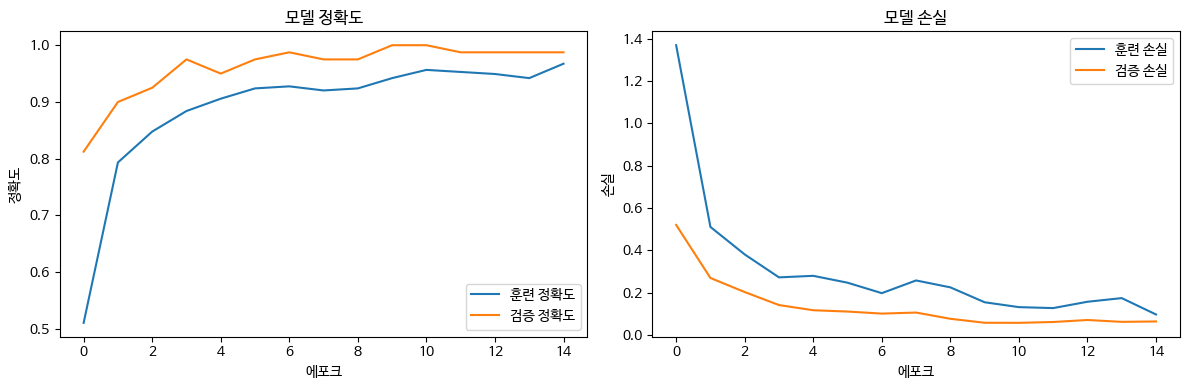

In [23]:
# 6. 훈련 결과 시각화
print("\n📊 훈련 결과 시각화:")
plot_training_history(history)


🎯 모델 성능 평가:
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 9s/step


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/BugClassification/results/confusion_matrix.png'

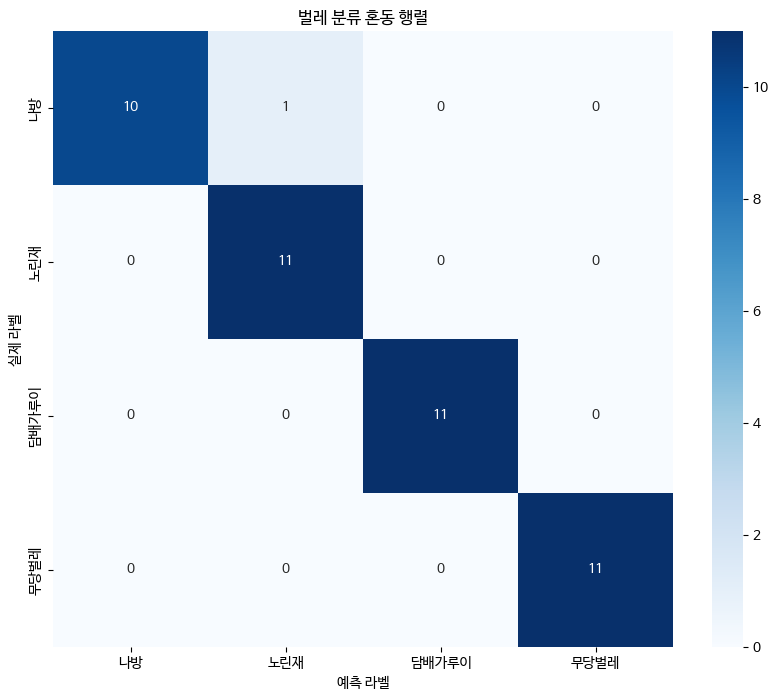

In [24]:
# 7. 모델 성능 평가
print("\n🎯 모델 성능 평가:")
accuracy, cm = evaluate_model(model, test_gen)

In [25]:
# 8. 최고 성능 저장
best_val_acc = max(history.history['val_accuracy'])
best_epoch = history.history['val_accuracy'].index(best_val_acc) + 1

print(f"\n🏆 훈련 결과 요약:")
print(f"  최고 검증 정확도: {best_val_acc:.4f} (에포크 {best_epoch})")
print(f"  최종 테스트 정확도: {accuracy:.4f}")
print(f"  모델 저장 경로: {os.path.join(MODELS_PATH, 'best_bug_model.h5')}")


🏆 훈련 결과 요약:
  최고 검증 정확도: 1.0000 (에포크 10)


NameError: name 'accuracy' is not defined

In [26]:
# 9. 훈련된 모델로 실제 예측 해보기
def predict_bug_image(image_path, show_image=True):
    """단일 이미지에 대한 벌레 분류 예측"""
    try:
        # 이미지 로드 및 전처리
        img = keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        # 예측
        predictions = model.predict(img_array, verbose=0)
        predicted_idx = np.argmax(predictions[0])
        confidence = predictions[0][predicted_idx]
        predicted_class = BUG_CLASSES[predicted_idx]

        # 결과 출력
        if show_image:
            plt.figure(figsize=(8, 6))
            plt.imshow(img)
            plt.title(f'예측: {predicted_class}\n신뢰도: {confidence:.2f}', fontsize=14)
            plt.axis('off')
            plt.show()

        # 모든 클래스 확률 출력
        print(f"\n🔍 예측 결과:")
        print(f"  예측 클래스: {predicted_class}")
        print(f"  신뢰도: {confidence:.4f}")
        print(f"\n📊 각 클래스별 확률:")
        for i, (bug_class, prob) in enumerate(zip(BUG_CLASSES, predictions[0])):
            print(f"  {bug_class}: {prob:.4f}")

        return predicted_class, confidence, predictions[0]

    except Exception as e:
        print(f"❌ 예측 중 오류 발생: {e}")
        return None, None, None


🧪 훈련된 모델 테스트:
테스트 데이터에서 몇 개 이미지로 예측해보겠습니다.

--- 테스트 1 ---



🔍 예측 결과:
  예측 클래스: 나방
  신뢰도: 0.9984

📊 각 클래스별 확률:
  나방: 0.9984
  노린재: 0.0003
  담배가루이: 0.0000
  무당벌레: 0.0012

--- 테스트 2 ---



🔍 예측 결과:
  예측 클래스: 노린재
  신뢰도: 0.9981

📊 각 클래스별 확률:
  나방: 0.0011
  노린재: 0.9981
  담배가루이: 0.0003
  무당벌레: 0.0004

--- 테스트 3 ---


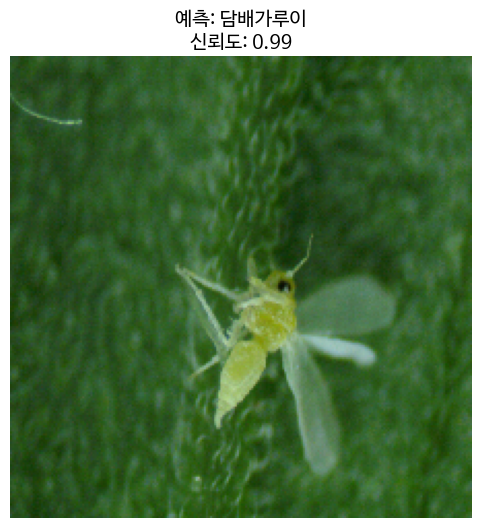


🔍 예측 결과:
  예측 클래스: 담배가루이
  신뢰도: 0.9870

📊 각 클래스별 확률:
  나방: 0.0006
  노린재: 0.0124
  담배가루이: 0.9870
  무당벌레: 0.0001

--- 테스트 4 ---



🔍 예측 결과:
  예측 클래스: 무당벌레
  신뢰도: 0.9571

📊 각 클래스별 확률:
  나방: 0.0115
  노린재: 0.0292
  담배가루이: 0.0022
  무당벌레: 0.9571

🎉 모델 훈련 완료!
📁 결과 파일들:
  - 모델: /content/drive/MyDrive/BugClassification/models/best_bug_model.h5
  - 훈련 그래프: /content/drive/MyDrive/BugClassification/results/training_history.png
  - 혼동 행렬: /content/drive/MyDrive/BugClassification/results/confusion_matrix.png


In [27]:
# 10. 테스트 이미지로 예측 해보기
print("\n🧪 훈련된 모델 테스트:")
print("테스트 데이터에서 몇 개 이미지로 예측해보겠습니다.")

# 각 클래스에서 하나씩 테스트
test_samples = []
for bug_class in BUG_CLASSES:
    class_path = os.path.join(PROCESSED_DATA_PATH, 'test', bug_class)
    if os.path.exists(class_path):
        image_files = [f for f in os.listdir(class_path)
                      if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if image_files:
            test_samples.append(os.path.join(class_path, image_files[0]))

# 샘플 예측
for i, sample_path in enumerate(test_samples[:4]):  # 최대 4개만
    print(f"\n--- 테스트 {i+1} ---")
    predict_bug_image(sample_path)

print(f"\n🎉 모델 훈련 완료!")
print(f"📁 결과 파일들:")
print(f"  - 모델: {os.path.join(MODELS_PATH, 'best_bug_model.h5')}")
print(f"  - 훈련 그래프: {os.path.join(RESULTS_PATH, 'training_history.png')}")
print(f"  - 혼동 행렬: {os.path.join(RESULTS_PATH, 'confusion_matrix.png')}")

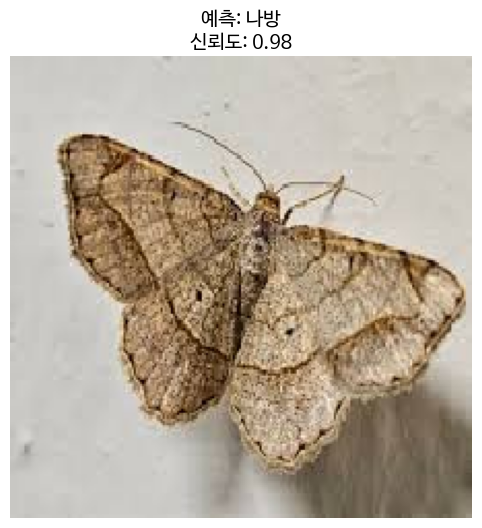


🔍 예측 결과:
  예측 클래스: 나방
  신뢰도: 0.9800

📊 각 클래스별 확률:
  나방: 0.9800
  노린재: 0.0021
  담배가루이: 0.0023
  무당벌레: 0.0156


('나방',
 np.float32(0.9800305),
 array([0.9800305 , 0.00206845, 0.0022928 , 0.01560835], dtype=float32))

In [31]:
predict_bug_image('/content/drive/MyDrive/Bug/test.jpeg')